In [43]:
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns

In [44]:
results = pd.read_csv('agg_results_nocur_1k.csv')

In [45]:
results.shape

(573000, 7)

In [46]:
results.insert(2, '2', results['0'].astype(str) + '_' + results['1'].astype(str))
len(results['2'].unique())

573

In [47]:
len(results['ei'].unique())

1

In [48]:
# ExpId,Trial,Node
# results[['0','1','2','ei','memory','search_cost','tau','6']].sort_values(by=['6'], ascending=False)[0:5]

In [49]:
# Dataset,ExpId,Trial
trial_df = results.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_26894/175509999.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=top, x='ei', ax=axes[2])


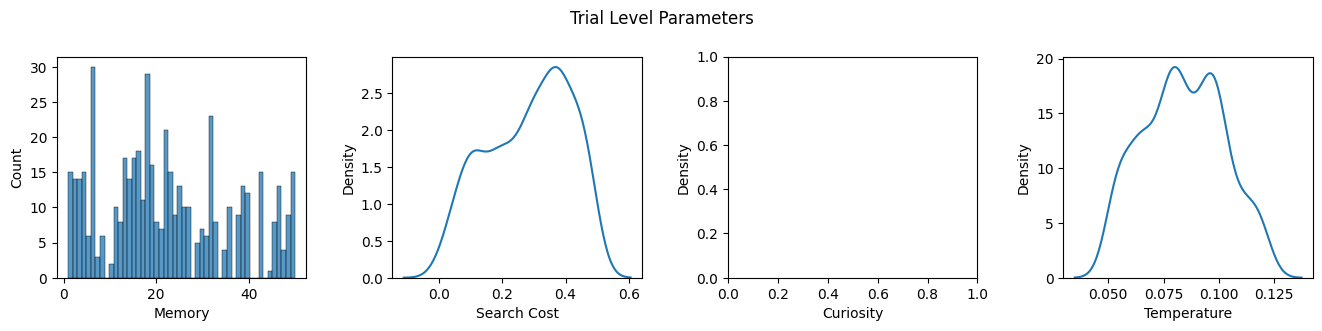

In [50]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Trial Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_nocur_trial.jpeg')
plt.show()

In [51]:
trial_df.sort_values(by=['6'],ascending=False)

,0,1,ei,memory,search_cost,tau,6
509372,2041,1,0,18,0.460956,0.050694,-0.002018
509451,2041,1,0,22,0.464149,0.055370,-0.004777
509066,2041,1,0,4,0.476953,0.063805,-0.019716
509789,2041,1,0,40,0.451827,0.063832,-0.024694
509917,2041,1,0,46,0.318258,0.055131,-0.053591
...,...,...,...,...,...,...,...
102372,1047,7,0,18,0.460956,0.050694,-1391.244686
220586,1062,5,0,29,0.062055,0.053656,-1431.432074
220946,1062,5,0,48,0.026002,0.053024,-1435.872820
220219,1062,5,0,12,0.066801,0.052724,-1441.145493


In [52]:
top.mean()

0              2043.282000
1                 2.924000
ei                0.000000
memory           22.460000
search_cost       0.284511
tau               0.083924
6                -5.882971
dtype: float64

In [53]:
# Dataset,ExpId
trial_df = results.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_26894/340263611.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=top, x='ei', ax=axes[2])


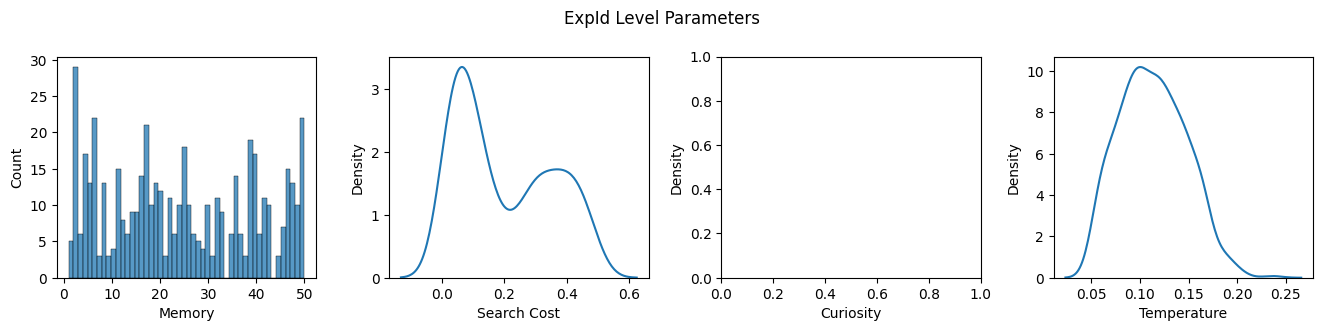

In [54]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('ExpId Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_nocur_expid.jpeg')
plt.show()

In [55]:
trial_df.sort_values(by=['6'],ascending=False)

,0,ei,memory,search_cost,tau,6
66750,2041,0,38,0.223473,0.091235,-20.558718
66964,2041,0,49,0.183988,0.097047,-20.907352
66780,2041,0,40,0.122612,0.092905,-21.079999
66616,2041,0,30,0.168444,0.098501,-21.205314
66389,2041,0,19,0.263787,0.099215,-21.230040
...,...,...,...,...,...,...
10372,1045,0,18,0.460956,0.050694,-1084.395149
26372,1061,0,18,0.460956,0.050694,-1093.491121
12372,1047,0,18,0.460956,0.050694,-1098.115479
13372,1048,0,18,0.460956,0.050694,-1101.368430


In [56]:
top.mean()

0              2040.712000
ei                0.000000
memory           24.448000
search_cost       0.199943
tau               0.113381
6               -27.127689
dtype: float64

In [57]:
# Dataset
trial_df = results.groupby(['ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

/var/folders/3c/w5n9m4w96bx0_qmrn9qzb__r0000gn/T/ipykernel_26894/2803549238.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=top, x='ei', ax=axes[2])


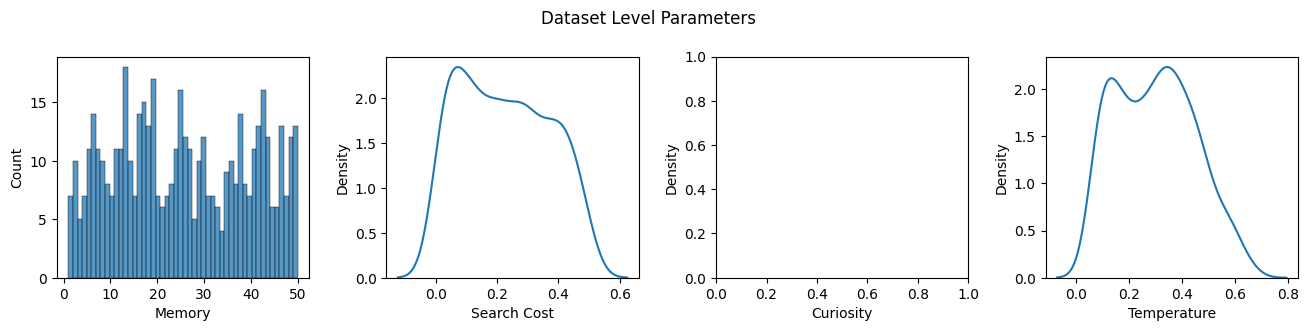

In [58]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Dataset Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_nocur_dataset.jpeg')
plt.show()

In [59]:
trial_df.sort_values(by=['6'],ascending=False)

,ei,memory,search_cost,tau,6
201,0,11,0.112553,0.108804,-236.504415
616,0,30,0.168444,0.098501,-238.363592
710,0,36,0.117831,0.099980,-238.985490
964,0,49,0.183988,0.097047,-239.658542
779,0,40,0.096569,0.124451,-239.731691
...,...,...,...,...,...
17,0,1,0.492040,0.994025,-368.657959
196,0,10,0.499686,0.999888,-368.813038
917,0,46,0.318258,0.055131,-383.771210
451,0,22,0.464149,0.055370,-405.311275


In [60]:
top.mean()

ei               0.000000
memory          25.514000
search_cost      0.225243
tau              0.299098
6             -310.753428
dtype: float64